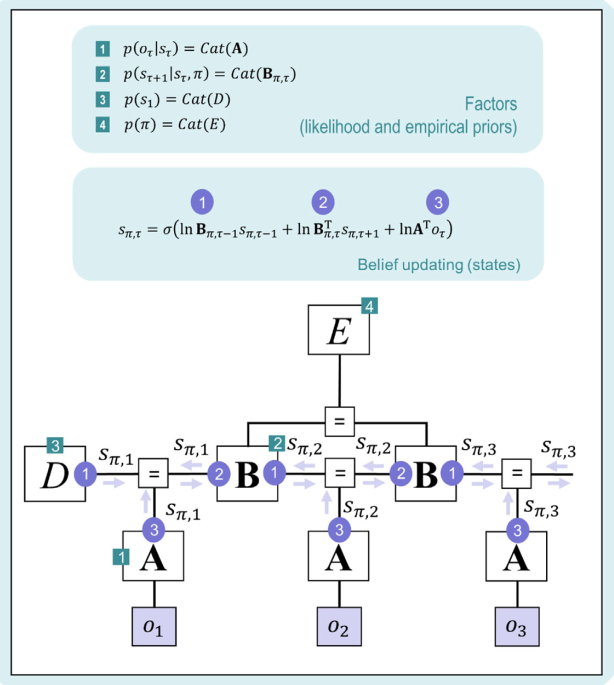
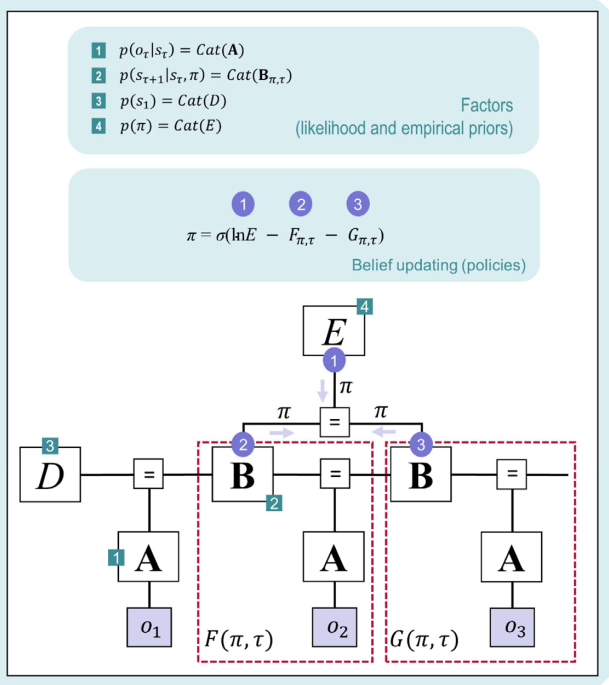

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Here you can set the number of policies and the distributions that
# contribute to prior and posterior policy precision

# inclusion or not of these terms E, F, gamma is a modeling decision
E = np.ones(5)#[1 1 1 1 1]';                  # Set a fixed-form prior distribution 
                                              # over policies (habits)
                            # reflecting number of times a policy has previously been chosen

G = np.array([12.505, 9.51, 12.5034, 12.505, 12.505])#';     # Set an example expected 
                                              # expected free energy distribution over policies

F = np.array([17.0207, 1.7321, 1.7321, 17.0387, 17.0387])#'; # Set an example variational 
                                              # free energy distribution over 
                                              # policies after a new observation
        # the observation is consistent with the policies that got higher values


gamma_0 = 1                 # Starting expected free energy precision value
psi = 2                     # Step size parameter (promotes stable convergence) 
n_updates = 16

gamma_dopamine = np.zeros((n_updates))
policies_neural = np.zeros((len(G), n_updates))

def EFE_precision_updating(E_0, G_0, F_o, gamma_0, psi = 2, n_updates = 16):
    # see page 20 in paper for explanation of these eq's
    
    gamma = gamma_0             # Initial expected free energy precision to be updated
    beta_prior = 1/gamma        # Initial prior on expected free energy precision gamma, a rate parameter on a Gamma dist with shape param = 1
    beta_posterior = beta_prior # Initial posterior on expected free energy precision gamma, a rate parameter on a Gamma dist
    # Expected value of gamma is reciprocal of beta
    
    gamma_dopamine = np.zeros((n_updates))
    policies_neural = np.zeros((len(G), n_updates))
    
    for ni in range(n_updates):# = 1:16 # number of variational updates (16)

        # calculate prior and posterior over policies (see main text for 
        # explanation of equations) 

        pi_0 = np.exp(np.log(E) - gamma*G)/sum(np.exp(np.log(E) - gamma*G)); # prior over policies (softmax)

        pi_posterior = np.exp(np.log(E) - gamma*G - F)/sum(np.exp(np.log(E) - gamma*G - F)); # posterior 
                                                                                 # over policies (softmax)
        # calculate expected free energy precision 
        G_error = (pi_posterior - pi_0)@-G; # expected free energy prediction error

        beta_update = beta_posterior - beta_prior + G_error; # change in beta:  
                                                             # gradient of F with respect to gamma 
                                                             # (recall gamma = 1/beta)

        beta_posterior = beta_posterior - beta_update/psi; # update posterior precision 
                                                       # estimate (with step size of psi = 2, which reduces 
                                                       # the magnitude of each update and can promote 
                                                       # stable convergence)

        gamma = 1/beta_posterior; # update expected free energy precision # Expected value of gamma is reciprocal of beta


        # simulate dopamine responses

        n = ni;

        gamma_dopamine[n] = gamma; # simulated neural encoding of precision
                                     # (beta_posterior^-1) at each iteration of 
                                     # variational updating                                 

        policies_neural[:, n] = pi_posterior; # neural encoding of posterior over policies at 
                                             # each iteration of variational updating

    return gamma_dopamine, policies_neural
